In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('CCS_200301_202204  amudalapalli m.csv')

In [3]:
df.head()

,time,Rain
0,2003-01-01,1
1,2003-02-01,0
2,2003-03-01,13
3,2003-04-01,20
4,2003-05-01,64


In [4]:
df.tail()

,time,Rain
227,2021-12-01,0
228,2022-01-01,0
229,2022-02-01,0
230,2022-03-01,0
231,2022-04-01,1


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2003-01-01,1
1,2003-02-01,0
2,2003-03-01,13
3,2003-04-01,20
4,2003-05-01,64


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.head()

,time,Rain
0,2003-01-01,1
1,2003-02-01,0
2,2003-03-01,13
3,2003-04-01,20
4,2003-05-01,64


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,Rain
time,
2003-01-01,1
2003-02-01,0
2003-03-01,13
2003-04-01,20
2003-05-01,64


In [10]:
df.describe()

,Rain
count,232.000000
mean,132.732759
std,161.106072
min,0.000000
25%,1.750000
50%,74.000000
75%,209.500000
max,939.000000


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Rain'])

In [13]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Rain'])

ADF Test Statistic : -4.467358899792617
p-value : 0.00022514118644011087
#Lags Used : 15
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
df['Sales First Difference'] = df['Rain'] - df['Rain'].shift(1)

In [16]:
df['Rain'].shift(1)

time
2003-01-01      NaN
2003-02-01      1.0
2003-03-01      0.0
2003-04-01     13.0
2003-05-01     20.0
              ...  
2021-12-01    355.0
2022-01-01      0.0
2022-02-01      0.0
2022-03-01      0.0
2022-04-01      0.0
Name: Rain, Length: 232, dtype: float64

In [17]:
df['Seasonal First Difference']=df['Rain']-df['Rain'].shift(12)

In [18]:
df.head(14)

,Rain,Sales First Difference,Seasonal First Difference
time,,,
2003-01-01,1,NaN,NaN
2003-02-01,0,-1.0,NaN
2003-03-01,13,13.0,NaN
2003-04-01,20,7.0,NaN
2003-05-01,64,44.0,NaN
2003-06-01,288,224.0,NaN
2003-07-01,351,63.0,NaN
2003-08-01,145,-206.0,NaN
2003-09-01,201,56.0,NaN


In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.612174168723122
p-value : 2.240075842501993e-11
#Lags Used : 11
Number of Observations Used : 208
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

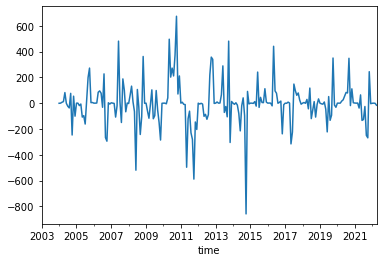

In [20]:
df['Seasonal First Difference'].plot()

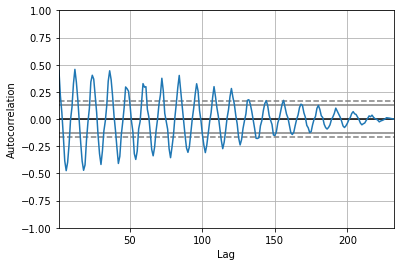

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

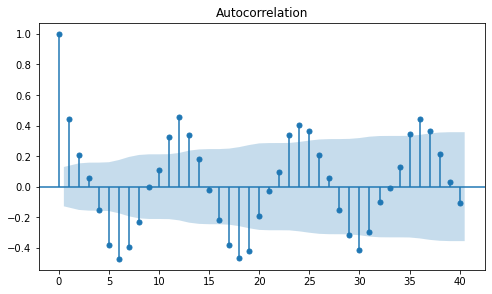

In [23]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

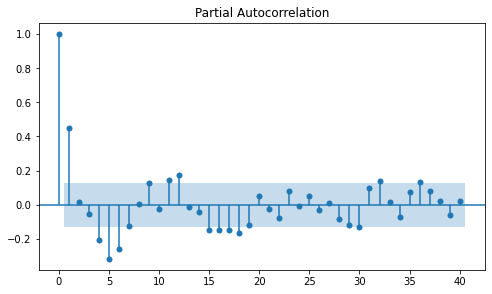

In [24]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model=ARIMA(df['Rain'],order=(1,1,0))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rain   No. Observations:                  231
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1502.723
Method:                       css-mle   S.D. of innovations            161.769
Date:                Wed, 18 May 2022   AIC                           3011.446
Time:                        15:46:32   BIC                           3021.773
Sample:                    02-01-2003   HQIC                          3015.611
                         - 04-01-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.943e-06      8.273   2.35e-07      1.000     -16.214      16.214
ar.L1.D.Rain    -0.2879      0.063     -4.582      0.000      -0.411      -0.165
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.4738           +0.0000j            3.4738            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

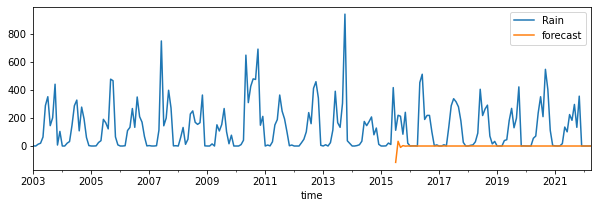

In [28]:
df['forecast']=model_fit.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [29]:
import statsmodels.api as sm

In [30]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

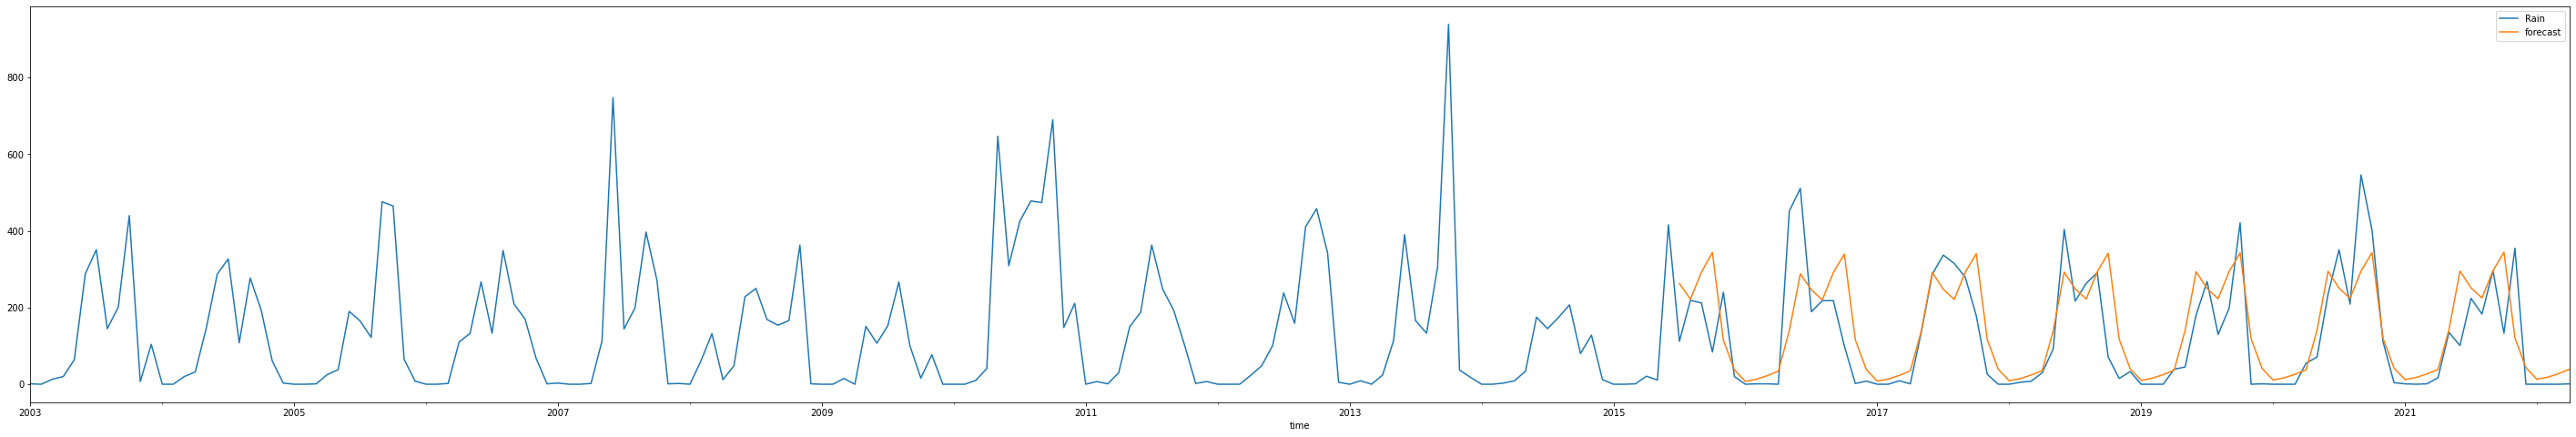

In [31]:
df['forecast']=results.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [33]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_datest_df.tail()

,Rain,Sales First Difference,Seasonal First Difference,forecast
2026-11-01,NaN,NaN,NaN,NaN
2026-12-01,NaN,NaN,NaN,NaN
2027-01-01,NaN,NaN,NaN,NaN
2027-02-01,NaN,NaN,NaN,NaN
2027-03-01,NaN,NaN,NaN,NaN


In [35]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

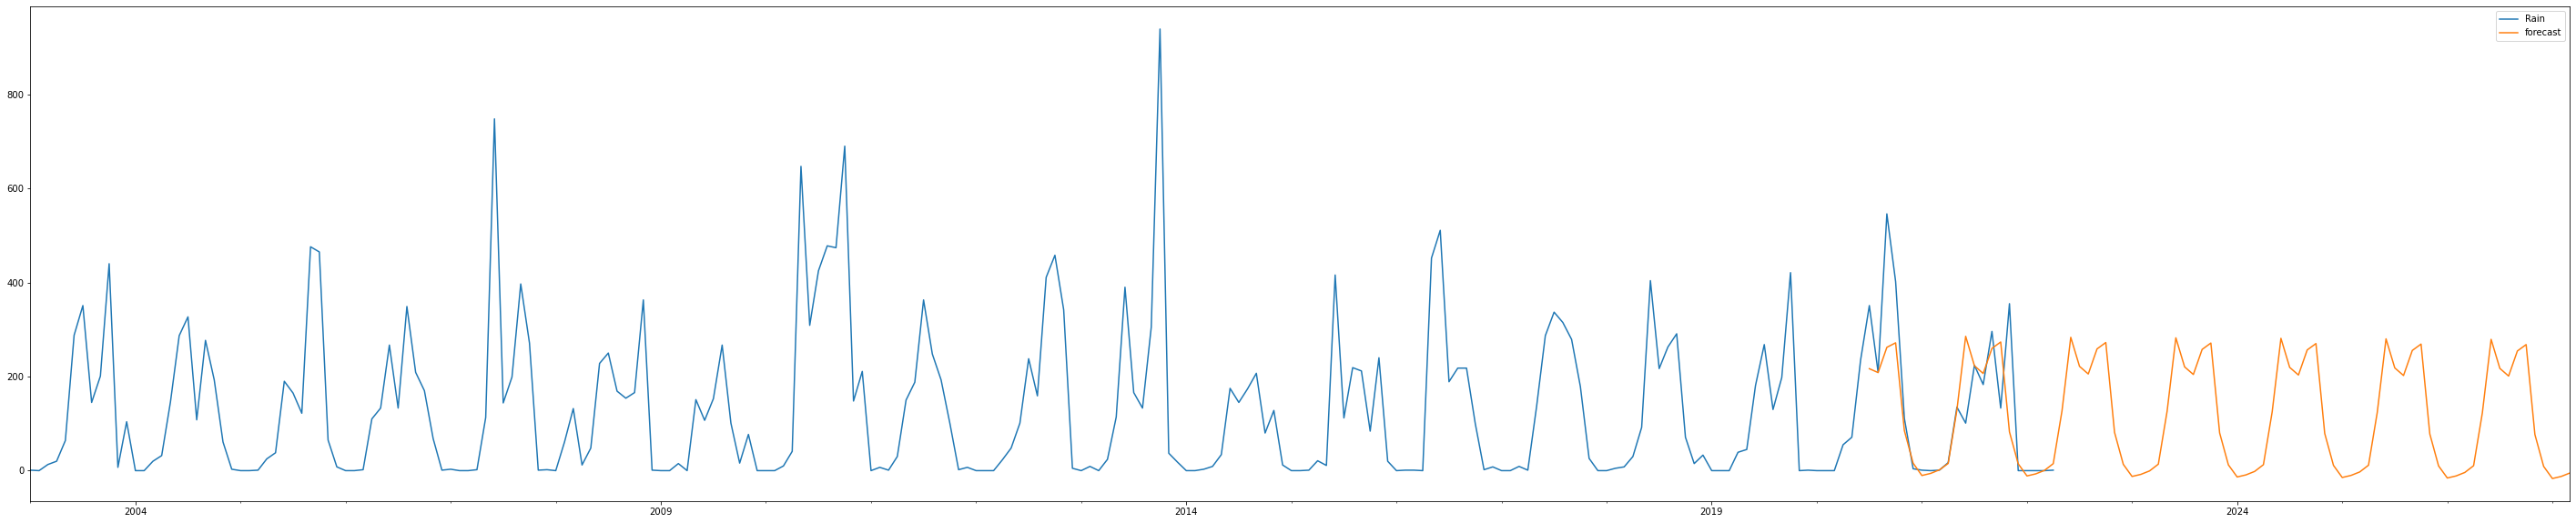

In [36]:
future_df['forecast'] = results.predict(start = 210, end = 291, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [37]:
future_df['forecast'].tail(60)

2022-04-01     14.883805
2022-05-01    127.136042
2022-06-01    283.508181
2022-07-01    221.720027
2022-08-01    205.533199
2022-09-01    258.816862
2022-10-01    272.412821
2022-11-01     81.261456
2022-12-01     13.369463
2023-01-01    -12.367233
2023-02-01     -7.980947
2023-03-01     -0.581608
2023-04-01     13.772772
2023-05-01    126.062280
2023-06-01    282.431465
2023-07-01    220.626449
2023-08-01    204.436549
2023-09-01    257.720065
2023-10-01    271.317573
2023-11-01     80.164470
2023-12-01     12.272996
2024-01-01    -13.463513
2024-02-01     -9.077261
2024-03-01     -1.677977
2024-04-01     12.676710
2024-05-01    124.965491
2024-06-01    281.334734
2024-07-01    219.530046
2024-08-01    203.340206
2024-09-01    256.623725
2024-10-01    270.221203
2024-11-01     79.068134
2024-12-01     11.176650
2025-01-01    -14.559863
2025-02-01    -10.173610
2025-03-01     -2.774325
2025-04-01     11.580356
2025-05-01    123.869151
2025-06-01    280.238393
2025-07-01    218.433699
